In [ ]:
import sympy
from sympy import S, Symbol, symbols, Function, integrate, diff, Curve, plot, plot_parametric, latex, solveset, Interval
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Latex
from sympy import Function, latex, solve, S
from sympy import sin as Sin
from sympy import cos as Cos

## Занятие 11
## Математический анализ
## Применение интегралов для вычисления площади фигуры и длины дуги

### Задание 1
Вычислить площадь фигуры, ограниченной графиками функций $f = 2 + x^2$ и  $g = 2 - x^3$. Построить графики, найти точки пересечения, затем вычислить соответствующие интегралы.

<IPython.core.display.Latex object>

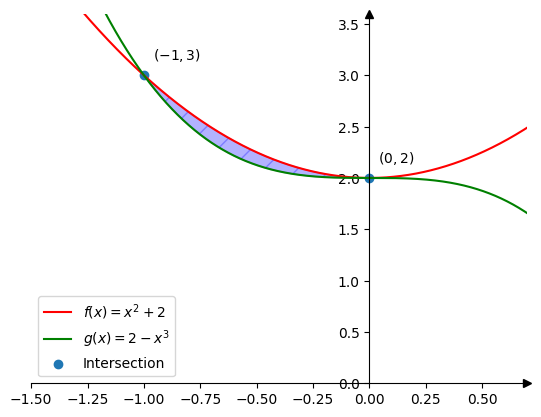

In [ ]:
x = Symbol('x')

def f(x):
    return 2 + x ** 2

def g(x):
    return 2 - x ** 3

# Intersectoin points of f(x) and g(x)
intersec_x = solve(f(x) - g(x), x)
intersec_y = [f(x) for x in intersec_x]

# Plotting graphs
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(xlim=(-1.5, 0.7), ylim=(0, 3.6))

X = np.linspace(-5, 5, 10000)
ax.plot(X, f(X), label=r'$f(x) = ' + latex(f(x)) + r'$', color="red")
ax.plot(X, g(X), label=r'$g(x) = ' + latex(g(x)) + r'$', color="green")

ax.scatter(intersec_x, intersec_y, label='Intersection')
for i, x_coord in enumerate(intersec_x):
    ax.annotate(r'$\left(' + latex(x_coord) + r',' + latex(intersec_y[i]) + r'\right)$', xy=(x_coord, intersec_y[i]), xycoords='data', xytext=(x_coord + 0.04, intersec_y[i] + 0.15))

ax.legend(loc='lower left')

a = int(sorted(intersec_x)[0])
b = int(sorted(intersec_x)[-1])
X_ = np.linspace(a, b, 200)
ax.fill_between(X_, f(X_), g(X_), hatch="/", color="blue", alpha=0.3)


I_f = abs(integrate(f(x), (x, a, b)))
I_g = abs(integrate(g(x), (x, a, b)))
S = I_f - I_g

u = Function('f')
c, d = symbols('c d')
I_mold = integrate(u(x), (x, c, d))

I_f_disp = I_mold.subs({u(x): f(x), c: a, d: b})
I_g_disp = I_mold.subs({u(x): g(x), c: a, d: b})

display(Latex(r'$$S_{f \cap g}' + fr'= {latex(I_mold.subs({c: "a", d: "b"}))} - {latex(I_mold.subs({u(x): "g(x)", c: "a", d: "b"}))} = {latex(I_f_disp)} - {latex(I_g_disp)} = {latex(I_f)} - {latex(I_g)} = {latex(S)}$$'))


### Задача 2.
Вычислить площадь фигуры, ограниченной графиком функции $x = \cos^3(t)$, $y = \sin^3(t)$, $0 \le t \le 2\pi$.

In [ ]:
t = Symbol('t')
def x(t):
    return Cos(t) ** 3
def y(t):
    return Sin(t) ** 3

I = abs(integrate(x(t) * y(t).diff(t), (t, 0, 2 * sympy.pi)))
I

3*pi/8

### Задача 3.
Вычислить площадь фигуры, ограниченной графиком функции $r = \cos(2\phi)$, $-\frac{\pi}{4} \le \phi \le \frac{\pi}{4}$.

In [ ]:
phi = Symbol('phi', positive=True)
def r(arg):
    return Cos(2 * arg)

I = abs(1/2 * integrate( r(phi) ** 2, (phi, -sympy.pi / 4, sympy.pi / 4)))
display(I)

0.125*pi

### Задача 4.
Вычислить длину кривой, заданной уравнением $y^2 = x^3$ при $x$ от 1 до 3.

In [ ]:
def y(x):
    return sympy.Pow(x, 3)

I = abs(integrate(sympy.sqrt(1 + diff(sympy.sqrt(x ** 3), x) ** 2), (x, 1, 3)))
I

-13*sqrt(13)/27 + 31*sqrt(31)/27

### Задача 5.
Вычислить длину кривой, заданной параметрически $x = \frac{3}{2}\cos^3 t $, $y = 3\sin^3 t$.

In [ ]:
def x(t):
    return 3 / 2 * Cos(t) ** 3
def y(t):
    return 3 * Sin(t) ** 3

I = integrate(sympy.sqrt(x(t).diff(t) ** 2 + y(t).diff(t) ** 2), (t, 0, 2 * sympy.pi)).evalf()
I

14.00

### Задача 6.
Вычислить длину кривой, заданной в полярных координатах
$r = \phi$, $\phi$ от 0 до $2\pi$. Результат вычислить приближенно до 3 знаков после запятой.

$$
l=\int_\alpha^\beta\sqrt{\dot{\phi}^2(t)+\dot{\psi}^2(t)}\,dt
$$

In [ ]:
def r(phi):
    return phi

I = round(1 / 2 * abs(integrate(r(phi) ** 2, (phi, 0, 2 * sympy.pi))), 3)
I = sympy.Integral(sympy.sqrt(r(phi) ** 2 + r(phi).diff(phi) ** 2), (phi, 0, 2 * sympy.pi)).doit().evalf(5)
I

21.256

### Индивидуальное задание
Вычислить площадь фигуры, ограниченной графиками функций $f = 2\sin(x)$ и  $g = \cos(2x)$ на интервале  $[0, \pi]$. Построить графики, найти точки пересечения (выделить корни на интервале с помощью intersect и Interval), затем вычислить соответствующие интегралы.

Вариант 98

$$f(x)=5 \cos{\left(3 x \right)}$$
$$g(x)=\cos{\left(6 x \right)}$$

на интервале $[0;0.7 \pi]$

<IPython.core.display.Latex object>

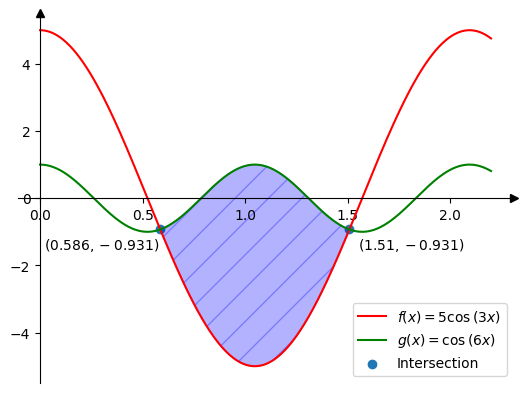

In [ ]:
x = Symbol('x', positive=True)

def f(x, lib='sympy'):
    if lib == 'numpy':
        return 5 * np.cos(3 * x)
    return 5 * Cos(3 * x)

def g(x, lib='sympy'):
    if lib == 'numpy':
        return np.cos(6 * x)
    return Cos(6 * x)

intersec_x = list(solveset(f(x) - g(x), x).intersect(Interval(0, 0.7 * sympy.pi)))
intersec_y = [f(x) for x in intersec_x]

# Plotting graphs
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

X = np.linspace(0, np.pi * 0.7, 700)
ax.plot(X, f(X, 'numpy'), label=r'$f(x) = ' + latex(f(x)) + r'$', color="red")
ax.plot(X, g(X, 'numpy'), label=r'$g(x) = ' + latex(g(x)) + r'$', color="green")

ax.scatter(intersec_x, intersec_y, label='Intersection')
# for i, x_coord in enumerate(intersec_x):
#     ax.annotate(r'$\left(' + latex(x_coord.evalf(3)) + r',' + latex(intersec_y[i].evalf(3)) + r'\right)$', xy=(x_coord, intersec_y[i]), xycoords='data', xytext=(x_coord + 0.04, intersec_y[i] - 0.15))
ax.annotate(r'$\left(' + latex(intersec_x[0].evalf(3)) + r',' + latex(intersec_y[0].evalf(3)) + r'\right)$', xy=(intersec_x[0], intersec_y[0]), xycoords='data', xytext=(intersec_x[0] + 0.04, intersec_y[0] - 0.6))

ax.annotate(r'$\left(' + latex(intersec_x[1].evalf(3)) + r',' + latex(intersec_y[1].evalf(3)) + r'\right)$', xy=(intersec_x[1], intersec_y[1]), xycoords='data', xytext=(intersec_x[1] - 0.565, intersec_y[0] - 0.6))

ax.legend(loc='lower right')


a = float(sorted(intersec_x)[0])
b = float(sorted(intersec_x)[-1])

X_ = np.linspace(a, b, 100)
f_ = sympy.lambdify(x, f(x))
g_ = sympy.lambdify(x, g(x))
ax.fill_between(X_, f_(X_), g_(X_), hatch="/", color="blue", alpha=0.3)

aligned_y = float(abs(sorted(intersec_y)[0]))
I_f = integrate(f(x) + aligned_y, (x, a, b))
I_g = integrate(g(x) + aligned_y, (x, a, b))
S = abs(I_f) + abs(I_g)

u = Function('f')
c, d = symbols('c d')
I_mold = integrate(u(x), (x, c, d))

I_f_disp = I_mold.subs({u(x): f(x) + aligned_y, c: a, d: b})
I_g_disp = I_mold.subs({u(x): g(x) + aligned_y, c: a, d: b})

display(Latex(r'$$ S_{f \cap g}' + fr'= \left|\ {latex(I_mold.subs({u(x): f"f(x) + {aligned_y}", c: "a", d: "b"}))}\ \right| + \left|{latex(I_mold.subs({u(x): f"g(x) + {aligned_y}", c: "a", d: "b"}))}\ \right| = \left| \ {latex(I_f_disp)}\ \right| + \left| \ {latex(I_g_disp)}\ \right| = \left| \ {latex(I_f)}\ \right| + \left|\ {latex(I_g)}\ \right| = {latex(S.evalf())}$$'))
